<a href="https://colab.research.google.com/github/sumanthgm/Statistical_Model_For_Decision_Making/blob/main/Smdaproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set given for the project is from "https://archive beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees"  and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. . The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. Each quarter represents one week in a month. The days beyond 28 days are considered as quarter 5 which can be ignored. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
    1. Date
    2. Quarter (Four Quarters)
    3. Department (Sewing and Finishing)
    4. Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
    5. Team
    6. Targeted_Producitivity (Target which needs to be achieved)
    7. SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment
    8. WIP (Work in progress)
    9. Over_time
    10. Incentive
    11. Idle_time
    12. Idle_men (Idle workers)
    13. no_of_style_change
    14. no_of_workers
    15. Actual_Producitivity
The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect.

Suppose the manager is interested in the following questions

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

In [4]:
#1
df=pd.read_csv(r"/content/drive/MyDrive/Data - Science (PES)/Sem 1/Statastics/Project/garments_worker_productivity-1.csv")
summary_stats = df.describe()
print(summary_stats)


              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

In [5]:
#2
print(df['day'].value_counts())

print("\nCount of Quarters:")
print(df['quarter'].value_counts())


day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

Count of Quarters:
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


In [6]:
#2 print("Count of Working Days:")
print(df['day'].value_counts())

print("\nCount of Quarters:")
print(df['quarter'].value_counts())


day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

Count of Quarters:
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851


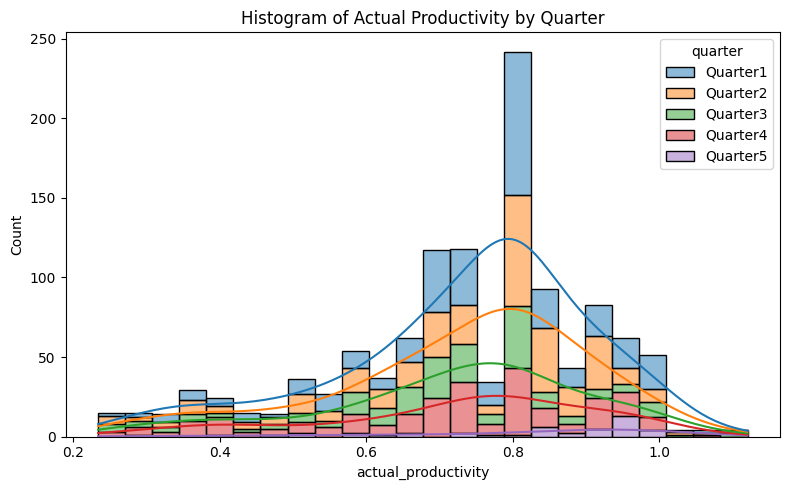

In [7]:
#3
print(df.groupby('quarter')['actual_productivity'].agg(['mean', 'std']))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='actual_productivity', hue='quarter', kde=True, multiple='stack')
plt.title("Histogram of Actual Productivity by Quarter")
plt.tight_layout()
plt.show()


In [8]:
#4
print(df['department'].value_counts())


department
sewing       691
finishing    506
Name: count, dtype: int64


                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784


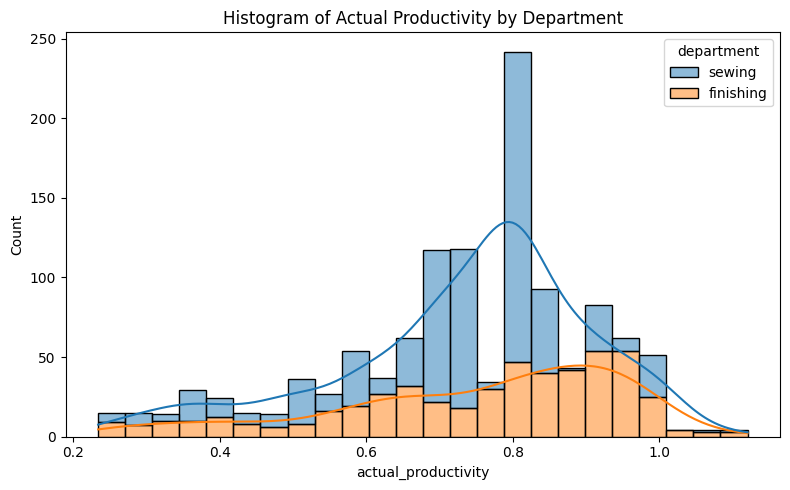

In [9]:
#5
print(df.groupby('department')['actual_productivity'].agg(['mean', 'std']))

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='actual_productivity', hue='department', kde=True, multiple='stack')
plt.title("Histogram of Actual Productivity by Department")
plt.tight_layout()
plt.show()


In [10]:
#6
print(df['team'].value_counts())

print("\nSMV Bins:")
print(pd.cut(df['smv'], bins=5).value_counts())


team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

SMV Bins:
smv
(2.848, 13.232]     577
(13.232, 23.564]    318
(23.564, 33.896]    284
(44.228, 54.56]      11
(33.896, 44.228]      7
Name: count, dtype: int64


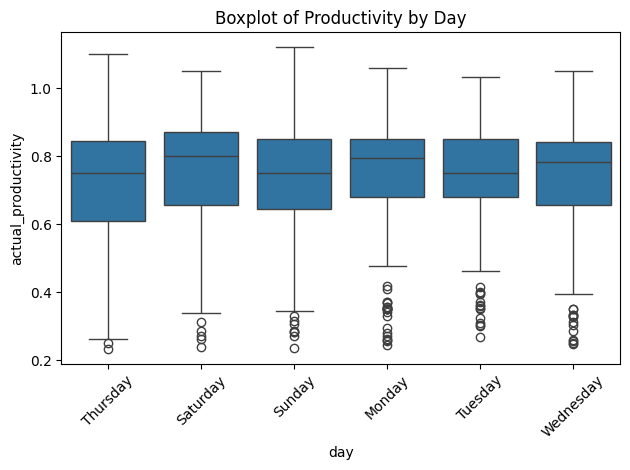

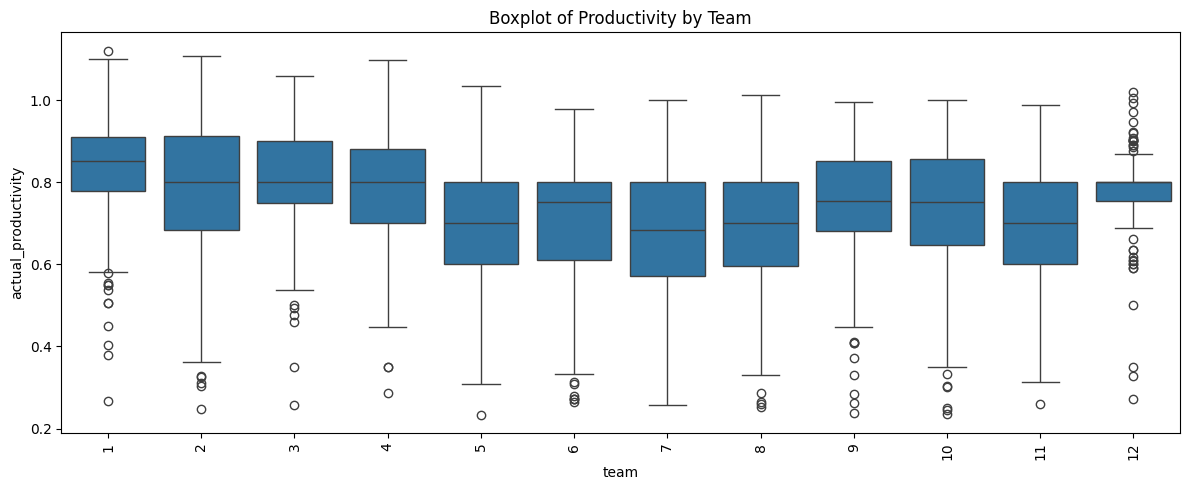

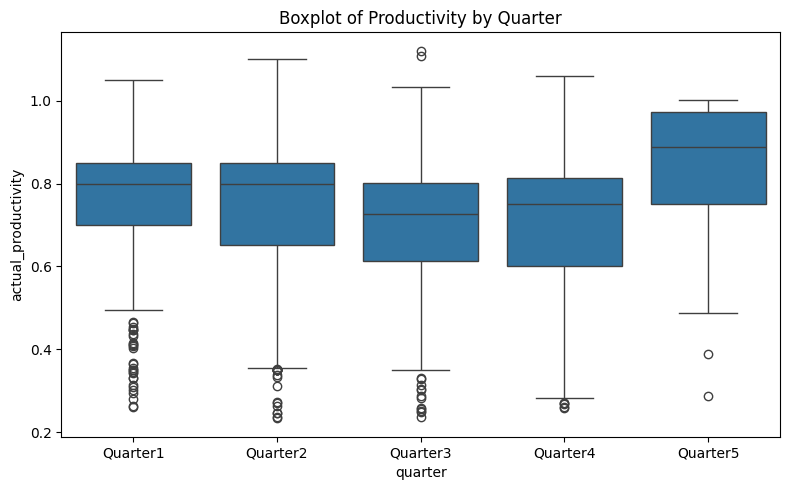

In [11]:
#7
sns.boxplot(data=df, x='day', y='actual_productivity')
plt.title("Boxplot of Productivity by Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='team', y='actual_productivity')
plt.title("Boxplot of Productivity by Team")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quarter', y='actual_productivity')
plt.title("Boxplot of Productivity by Quarter")
plt.tight_layout()
plt.show()


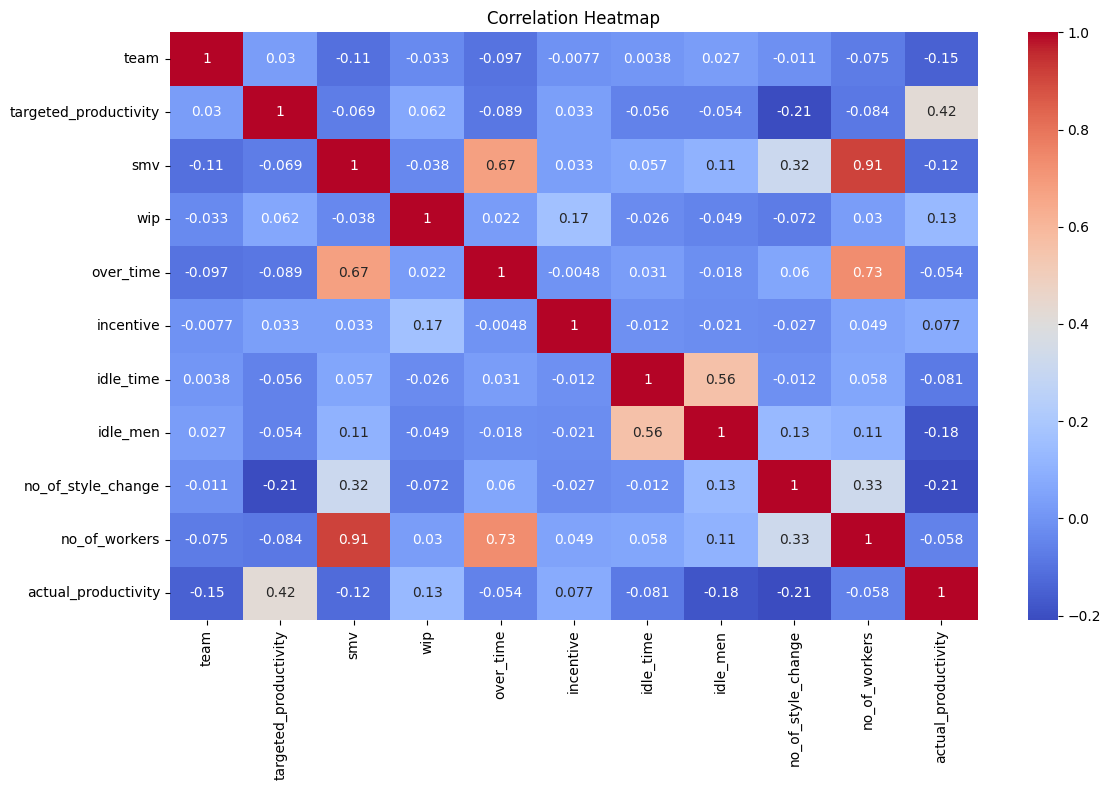

In [12]:
#8
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [13]:
#9
df['met_target'] = df['actual_productivity'] >= df['targeted_productivity']
print("Percentage of rows meeting target:", df['met_target'].mean() * 100)

print("Correlation with Incentive:", df['actual_productivity'].corr(df['incentive']))
print("Correlation with Overtime:", df['actual_productivity'].corr(df['over_time']))


Percentage of rows meeting target: 73.09941520467837
Correlation with Incentive: 0.07653762727386515
Correlation with Overtime: -0.054205837140021404


In [14]:
#10
print("Quarter-wise Correlation between Targeted and Actual Productivity:")
print(df.groupby('quarter')[['targeted_productivity', 'actual_productivity']].corr().iloc[0::2, -1])

print("\nDepartment-wise Correlation between Targeted and Actual Productivity:")
print(df.groupby('department')[['targeted_productivity', 'actual_productivity']].corr().iloc[0::2, -1])


Quarter-wise Correlation between Targeted and Actual Productivity:
quarter                        
Quarter1  targeted_productivity    0.492779
Quarter2  targeted_productivity    0.427164
Quarter3  targeted_productivity    0.392637
Quarter4  targeted_productivity    0.347594
Quarter5  targeted_productivity    0.479972
Name: actual_productivity, dtype: float64

Department-wise Correlation between Targeted and Actual Productivity:
department                       
finishing   targeted_productivity    0.09751
sewing      targeted_productivity    0.69797
Name: actual_productivity, dtype: float64


In [15]:
#11
print("Correlation with Actual Productivity (Descending):")
print(corr_matrix['actual_productivity'].drop('actual_productivity').sort_values(ascending=False))


Correlation with Actual Productivity (Descending):
targeted_productivity    0.421594
wip                      0.131147
incentive                0.076538
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64


Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.


In [16]:
#12
from scipy.stats import norm

# Sample
finishing = df[df['department'] == 'finishing']['actual_productivity'].dropna()
sample = finishing.sample(n=35, random_state=42)

# Hypothesis: H0: μ <= 0.75, H1: μ > 0.75
sample_mean = sample.mean()
sigma = 0.1
mu = 0.75
z_stat = (sample_mean - mu) / (sigma / np.sqrt(len(sample)))
p_value = 1 - norm.cdf(z_stat)
print(f"Z-Statistic: {z_stat}, P-value: {p_value}")


Z-Statistic: 1.4695894678156023, P-value: 0.07083648724096181


In [17]:
#13# Sample
sewing = df[df['department'] == 'sewing']['actual_productivity'].dropna()
sample = sewing.sample(n=35, random_state=42)

# Hypothesis: H0: μ <= 0.75, H1: μ > 0.75
sample_mean = sample.mean()
z_stat = (sample_mean - mu) / (sigma / np.sqrt(len(sample)))
p_value = 1 - norm.cdf(z_stat)
print(f"Z-Statistic: {z_stat}, P-value: {p_value}")


Z-Statistic: -1.3998150098748523, P-value: 0.9192156390767584


In [18]:
#14
from scipy.stats import ttest_ind

finishing_sample = finishing.sample(n=40, random_state=1)
sewing_sample = sewing.sample(n=40, random_state=2)

t_stat, p_value = ttest_ind(finishing_sample, sewing_sample, equal_var=False)
print(f"T-Statistic: {t_stat}, P-value: {p_value}")


T-Statistic: 0.152553754094329, P-value: 0.8791525361836214


In [20]:
#15
finishing_inc = df[df['department'] == 'finishing']['incentive'].dropna()
sewing_inc = df[df['department'] == 'sewing']['incentive'].dropna()

# small samples
finishing_sample = finishing_inc.sample(n=25, random_state=10)
sewing_sample = sewing_inc.sample(n=25, random_state=11)

# normality check
from scipy.stats import shapiro
p1 = shapiro(finishing_sample).pvalue
p2 = shapiro(sewing_sample).pvalue

if p1 > 0.05 and p2 > 0.05:
    t_stat, p_value = ttest_ind(finishing_sample, sewing_sample, equal_var=False)
else:
    # take larger samples if not normal
    finishing_sample = finishing_inc.sample(n=40, random_state=10)
    sewing_sample = sewing_inc.sample(n=40, random_state=11)
    t_stat, p_value = ttest_ind(finishing_sample, sewing_sample, equal_var=False)

print(f"T-Statistic: {t_stat}, P-value: {p_value}")


T-Statistic: -6.109623038316479, P-value: 2.6038092146363154e-06


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:
#16
# Classify
df['prod_class'] = pd.cut(df['actual_productivity'], [-float('inf'), 0.5, 0.75, float('inf')], labels=['Low', 'Medium', 'High'])
import numpy as np
from scipy.stats import chisquare

# Step 1: Create the productivity class column
df['prod_class'] = pd.cut(df['actual_productivity'],
                          bins=[-np.inf, 0.5, 0.75, np.inf],
                          labels=['Low', 'Medium', 'High'])

# Step 2: Observed frequencies for sewing department
observed = df[df['department'] == 'sewing']['prod_class'].value_counts().reindex(['Low', 'Medium', 'High']).fillna(0).to_numpy()

# Step 3: Manager's expected percentages
expected_pct = np.array([0.3, 0.4, 0.3])

# Step 4: Expected frequencies based on total count
expected = expected_pct * observed.sum()

# Step 5: Perform chi-square goodness-of-fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-Value: {p_value:.4f}")



Chi-Square Statistic: 315.2952
P-Value: 0.0000


In [22]:
#17
from scipy.stats import f_oneway

groups = [df[df['quarter'] == q]['actual_productivity'] for q in sorted(df['quarter'].unique())]
f_stat, p_value = f_oneway(*groups)
print(f"F-Statistic: {f_stat}, P-value: {p_value}")


F-Statistic: 7.11173497585018, P-value: 1.170397659389911e-05


In [23]:
#18
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('actual_productivity ~ C(day) + C(quarter) + C(day):C(quarter)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                      sum_sq      df         F    PR(>F)
C(day)              0.116280     5.0  0.773131  0.461801
C(quarter)          0.342276     4.0  2.844694  0.091942
C(day):C(quarter)   0.557592    20.0  0.926841  0.541534
Residual           35.223959  1171.0       NaN       NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [24]:
#19
# Let's say we found 'C(day):C(quarter)' was insignificant
model2 = ols('actual_productivity ~ C(day) + C(quarter) + C(department)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)


                  sum_sq      df         F    PR(>F)
C(day)          0.088124     5.0  0.593524  0.704972
C(quarter)      0.811255     4.0  6.829816  0.000020
C(department)   0.254897     1.0  8.583732  0.003457
Residual       35.218682  1186.0       NaN       NaN


In [25]:
#20
# Hypothesis 1: Actual productivity differs between departments
departments = df['department'].unique()
dept_productivity = [df[df['department'] == dept]['actual_productivity'] for dept in departments]
f_stat_dept, p_val_dept = f_oneway(*dept_productivity)

# Hypothesis 2: Actual productivity differs between days of the week
days = df['day'].unique()
day_productivity = [df[df['day'] == day]['actual_productivity'] for day in days]
f_stat_day, p_val_day = f_oneway(*day_productivity)

f_stat_dept, p_val_dept, f_stat_day, p_val_day

(np.float64(9.246175421332591),
 np.float64(0.002411259977623153),
 np.float64(0.7121012009422417),
 np.float64(0.614378842438619))